# MAZE PROBLEM

In [ ]:
# Author: Dani Gunawan
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [ ]:
# Define maze
maze = \
    np.array([[0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 0],
              [0, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 0],
              [0, 214, 215, 216, 217,   0, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 0],
              [0, 197, 198, 199, 200,   0, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 0],
              [0, 193, 194,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 195, 196, 0],
              [0, 176, 177,   0, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 0],
              [0, 162, 163,   0, 164, 165,   0, 166, 167,   0, 168, 169, 170, 171, 172,   0, 173, 174, 175, 0],
              [0, 151, 152,   0, 153, 154,   0, 155, 156,   0, 157, 158,   0,   0,   0,   0, 159, 160, 161, 0],
              [0, 136, 137, 138, 139, 140,   0, 141, 142,   0, 143, 144, 145, 146, 147,   0, 148, 149, 150, 0],
              [0, 121, 122, 123, 124, 125,   0, 126, 127,   0, 128, 129, 130, 131, 132,   0, 133, 134, 135, 0],
              [0,   0,   0,   0,   0, 111,   0, 112, 113,   0,   0, 114, 115, 116, 117,   0, 118, 119, 120, 0],
              [0,  99, 100, 101, 102, 103,   0, 104, 105, 106,   0, 107, 108,   0, 109,   0,   0,   0, 110, 0],
              [0,  89,  90,   0,   0,   0,   0,   0,  91,  92,   0,  93,  94,   0,  95,  96,  97,   0,  98, 0],
              [0,  75,  76,  77,  78,  79,  80,   0,  81,  82,   0,  83,  84,   0,  85,  86,  87,   0,  88, 0],
              [0,  60,  61,  62,  63,  64,  65,   0,  66,  67,   0,  68,  69,   0,  70,  71,  72,  73,  74, 0],
              [0,  47,  48,  49,  50,  51,  52,   0,  53,  54,  55,  56,  57,   0,   0,   0,   0,  58,  59, 0],
              [0,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46, 0],
              [0,   0,   0,  19,  20,  21,  22,   0,   0,   0,   0,   0,   0,  23,  24,  25,  26,  27,  28, 0],
              [0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18, 0],
              [0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 0]])

In [ ]:
# initialization bump, oil, wall, and goal
bump = [241, 242, 214, 215, 216, 176, 183, 191, 174, 152, 157, 158, 160,
        149, 93, 94, 60, 61, 58, 59, 35]
oil = [220, 228, 194, 180, 120, 55, 38, 24, 27, 7]
wall = [0]
goal = [208]
start = [50]
max = 248 # 248 states include goal
# parameters will be assigned when calling the function
#p = 0.02
#g = 0.95
#t = 0.01

actions_idx = [0, 1, 2, 3] # action indices
actions = ['U', 'D', 'R', 'L'] # actions: Up, Down, Right, Left

In [ ]:
# This function will return the status of a state
# val = state
# return status: {wall, empty, oil, bump, goal, ERROR}
def get_cell_status(val):
  if val in wall:
    return 'wall'
  elif val in oil:
    return 'oil'
  elif val in bump:
    return 'bump'
  elif val in goal:
    return 'goal'
  else:
    if val < 0 or val > max:
      print("State error")
      return 'ERROR'
    else:
      return 'empty'

In [ ]:
# This function will return the coordinates of a state (s) from a matrix (m)
# return [row, column]
def get_coordinate(m, s):
  c = np.where(m == s)
  return [c[0][0], c[1][0]]

In [ ]:
# This function will return the next state (s prime) based on current state (s) 
# and action
# m = maze
# s = current state
# action = U/D/R/L
# return s prime and status
def get_sprime(m, s, action):
  # find state coordinate
  c = get_coordinate(m, s)
  status = ''
  s_p = ''
  if action.upper() == 'L':
    #substract col by 1 [0, 1]
    tmp_col = np.subtract(c, [0, 1])
  elif action.upper() == 'R':
    # add column by 1 [0, 1]
    tmp_col = np.add(c, [0, 1])
  elif action.upper() == 'D':
    # add row by 1 [1, 0]
    tmp_col = np.add(c, [1, 0])
  elif action.upper() == 'U':
    # subtract row by 1 [1, 0]
    tmp_col = np.subtract(c, [1, 0])
  
  tmp_s_p = m[tmp_col[0]][tmp_col[1]] # s prime (tmp)
  # check cell status
  status = get_cell_status(tmp_s_p)
  if status == 'wall':
    # cannot go to the wall, back to previous state
    s_p = s
  else:
    # empty, oil, and bump
    s_p = tmp_s_p
  
  return [s_p, status]

In [ ]:
# This function will calculate the transition probability in a state
# m = maze
# s = current state
# action = anticipated action (U/D/R/L)
# actions = list of available actions
# return row, column, probability
def get_transition_prob(m, s, p, action, actions):
  result = []
  
  for act in actions:
    s_p, status = get_sprime(m, s, act) 
    if act == action.upper():
      # main action: 1-p
      result.append([s, s_p, 1-p])
    else:
      # stochastic action: p/3
      result.append([s, s_p, p/(len(actions)-1)])
  
  return result

In [ ]:
# This function will return reward in a state (s_prime)
# s_prime = state
# return s_prime and reward
def get_reward(s_prime):
  result = []

  status = get_cell_status(s_prime) 
  reward = -1 # default reward for taking action
  if status == 'bump':
    reward += -10
  elif status == 'oil':
    reward += -5
  elif status == 'goal':
    reward += 200
  
  result.append(s_prime)
  result.append(reward)
    
  return result  

In [ ]:
# This function will generate a number of transition matrices based on actions
# p = stochasticity
# actions = list of actions
# return a vector that contain transition matrices
def generate_transition_matrix(p, actions):

  t_matrix = []

  for act in actions:
    m = np.zeros((max, max))

    for i in range(1, max+1):
      res = get_transition_prob(maze, i, p, act, actions)
      for r in res:
        row = r[0]-1
        col = r[1]-1
        old_prob = m[row][col]
        cur_prob = r[2]
        new_prob = cur_prob + old_prob
        m[row][col] = new_prob
      
    #print(act)
    #print(m)
    # add m to t_matrix
    t_matrix.append(m)
  
  return t_matrix


In [ ]:
# This function will generate a number of reward matrices based on actions
# actions = list of actions
# return a vector that contain reward matrices
def generate_reward_matrix(actions):

  r_matrix = []

  for act in actions:
    m = np.zeros((max, max))

    for i in range(0, max):
      for j in range (1, max+1):
        r = get_reward(j)
        col = r[0]-1
        m[i][col] = r[1]
          
    #print(act)
    #print(m)
    # add m to r_matrix
    r_matrix.append(m)
  
  return r_matrix

In [ ]:
# Modified from provided codes
# Function to always color the oil, bump, wall, start, and goal blocks.
# States are in the form of a list of (i,j) coordinates on the state matrix
def coloring_blocks(heatmap, oil_states, bump_states, start_state, end_state, wall_states):
    # Adding red oil blocks
    for i in range(len(oil_states)):
        heatmap.add_patch(Rectangle((oil_states[i][1], oil_states[i][0]), 1, 1,
                                    fill=True, facecolor='red', edgecolor='maroon', lw=0.25))
    # Adding salmon bump blocks
    for i in range(len(bump_states)):
        heatmap.add_patch(Rectangle((bump_states[i][1], bump_states[i][0]), 1, 1,
                                    fill=True, facecolor='lightsalmon', edgecolor='firebrick', lw=0.25))
        
    # Adding grey wall blocks
    for i in range(len(wall_states)):
        heatmap.add_patch(Rectangle((wall_states[i][1], wall_states[i][0]), 1, 1,
                                    fill=True, facecolor='darkgray', edgecolor='dimgray', lw=0.25))
    # Adding start block (Blue)
    heatmap.add_patch(Rectangle((start_state[1], start_state[0]), 1, 1,
                                fill=True, facecolor='cornflowerblue', edgecolor='royalblue', lw=0.25))

    # Adding end block (Green)
    heatmap.add_patch(Rectangle((end_state[1], end_state[0]), 1, 1,
                                fill=True, facecolor='limegreen', edgecolor='green', lw=0.25))

In [ ]:
# This function will perform Policy Iteration Vector Form
# t_mat = transition matrices
# r_mat = reward matrices
# max = maximum number of states
# actions = list of actions
# initial policy = initial policy
# t = threshold
# g = discount factor (gamma)
# return pi star, v pi
def policy_iteration_vector(t_mat, r_mat, max, actions, initial_policy, t, g):

  #n = 0 # policy
  #t_mat[1]

  policy = []
  policy.append(initial_policy) #policy

  #policy[n][i]
  pi = 0 # policy iteration
  v_pi = 0
  pi_star = 0
  dv = 1 # assign delta v above threshold to start looping

  while (True):
    print("\n\nPolicy iteration: #" + str(pi+1))
    v = []
    v.append(np.zeros(max)) #V0

    # perform policy evaluation
    for pe in range(0, 10000): # pe = policy evaluation iteration
      v_eval = []
      for i in range(0, max): # v
        #print(i)
        tmp_v = 0
        for j in range(0, max): # s'
          #correct form:
          #print(str(t_mat[policy[pi][i]][i, j]) + " (" + str(r_mat[policy[pi][i]][i, j]) + " + " + str(g) + " . " + str(v[pe][j]) + ")")  
          tmp_v += t_mat[policy[pi][i]][i, j] * (r_mat[policy[pi][i]][i, j] + (g * v[pe][j]))
        
        #print(tmp_v)  
        v_eval.append(tmp_v)
      
      # add v_eval to v
      v.append(v_eval)
      #print(v[pe+1])
      #print(v[pe])
      #print(np.absolute(np.subtract(v[pe+1], v[pe])))
      dv_max = np.max(np.absolute(np.subtract(v[pe+1], v[pe])))
      #print(dv_max)
      
      if dv_max < t:
        v_pi = v[pe+1]
        print("Total policy evaluation iteration: " + str(pe+1))
        break

    # perform policy improvement
    pi_impv = []
    for i in range(0, max):
      #print('state: ' + str(i))
      impv = []
      for a in actions:
        tmp_impv = 0
        for j in range(0, max):
          #print(str(t_mat[a][i, j]) + " (" + str(r_mat[a][i, j]) + " + " + str(g) + " . " + str(v_pi[pi][j]) + ")")  
          tmp_impv += t_mat[a][i, j] * (r_mat[a][i, j] + (g * v_pi[j]))  
        
        impv.append(tmp_impv)
      pi_impv.append(np.argmax(impv))

    #print(pi_impv)
    policy.append(pi_impv)
    if (np.array_equal(policy[pi+1], policy[pi])):
      # stable
      pi_star = policy[pi+1]
      break
    else:
      pi += 1
  
  return pi_star, v_pi

In [ ]:
# This function will generate coordinate and action to form a path
# return path
def get_path(pi):
  path = []
  for s in range(1, max+1):
    #print('state: ' + str(s))
    c = get_coordinate(maze, s)
    act = pi[s-1]
    path.append([c, act])

  return path

In [ ]:
# This function will generate the block coordinates for oils, bumps, walls, start, and goal
# return oil, bump, wall, start, and goal coordinates
def get_blocks_coordinates():
  # get oil coordinates
  oil_c = []
  for o in oil:
    c = get_coordinate(maze, o)
    oil_c.append(c)

  # get bump coordinates
  bump_c = []
  for b in bump:
    c = get_coordinate(maze, b)
    bump_c.append(c)

  # get wall coordinates
  wc = np.where(maze == 0)
  wall_c = []
  for i in range(len(wc[0])):
    wall_c.append([wc[0][i], wc[1][i]])

  # get start coordinates
  for s in start:
    start_c = get_coordinate(maze, s)

  # get goal coordinates
  for g in goal:
    goal_c = get_coordinate(maze, g)

  return oil_c, bump_c, wall_c, start_c, goal_c

In [ ]:
# This function will draw arrow in maze based on given path
def draw_maze_arrow(maze, path):

  oil_c, bump_c, wall_c, start_c, goal_c = get_blocks_coordinates()

  # Define heatmap first
  plt.subplots(figsize=(13, 8))
  heatmap = sns.heatmap(maze, fmt=".2f", linewidths=0.25, linecolor='black', cbar=False, cmap='Blues')
  heatmap.set_facecolor('black') 

  coloring_blocks(heatmap, oil_states=oil_c, bump_states=bump_c, start_state=start_c, end_state=goal_c, wall_states=wall_c)
      
  # Plot the route from the start state to the end state.
  # This is just an example, you may want to keep pi* coordinates and actions in a different way
  #path = [((3,3),'right'), ((3,4),'down'), ((4,4),'right'), ((4,5),'down'), \
  #        ((5,5),'right'), ((5,6),'down'), ((6,6),'right'), ((6,7),'down')]
  for state_cr, direction in path:
      r = state_cr[0] # x_coordinate
      c = state_cr[1] # y_coordinate

      if direction == 2:
          plt.arrow(c + 0.5, r + 0.5, 0.8, 0, width=0.04, color='black')   # Right
      if direction == 3:
          plt.arrow(c + 0.5, r + 0.5, -0.8, 0, width=0.04, color='black')  # Left
      if direction == 0:
          plt.arrow(c + 0.5, r + 0.5, 0, -0.8, width=0.04, color='black')  # Up
      if direction == 1:
          plt.arrow(c + 0.5, r + 0.5, 0, 0.8, width=0.04, color='black')  # Down

  # Show plot
  plt.show()

In [ ]:
# This function will draw state values inside maze' blocks
def draw_maze_values(maze, vi):
  ### DRAW MAZE: OPTIMAL STATE VALUES
  # plot the value function values on the heat map
  plt.subplots(figsize=(13,8))

  # Create a 2D matrix of zeros with size of 20 x 20 
  vi_matrix = np.zeros((20,20)) 

  for i in range (1, max+1):
    c = get_coordinate(maze, i)
    vi_matrix[c[0], c[1]] = np.ceil(vi[i-1])

  oil_c, bump_c, wall_c, start_c, goal_c = get_blocks_coordinates()

  # Plot the new heatmap of the new value function values with the original state and coloring blocks
  heatmap = sns.heatmap(maze, fmt=".0f", annot=vi_matrix, linewidths=0.25, linecolor='black',
                        cbar=False, cmap= 'Blues')

  heatmap.set_facecolor('black') # Color for the NA cells in the state matrix
  coloring_blocks(heatmap, oil_states=oil_c, bump_states=bump_c, start_state=start_c, end_state=goal_c, wall_states=wall_c)

  plt.show()

In [ ]:
# This function will draw optimal policy path from starting state
def draw_maze_path(maze, pi):
  states = []
  states.append(start[0])
  c = get_coordinate(maze, start[0])
  act = pi[start[0]-1]
  path = []
  path.append([c, act])

  i = 0
  while (True):
    s_p, status = get_sprime(maze, states[i], actions[act])
    if status == 'goal':
      print("Steps: " + str(i+1))
      break
    else:
      # save coordinate
      states.append(s_p)
      act = pi[s_p-1]
      c = get_coordinate(maze, s_p)
      path.append([c, act])
      i += 1
    
    if i > 100:
      print("Steps: " + str(i))
      break

  draw_maze_arrow(maze, path)

### PROBLEM 1 - 1 (VECTOR FORM - POLICY ITERATION)

#### BASE SCENARIO

𝑝=0.02, 𝛾 =0.95, 𝜃 =0.01

In [ ]:
### VECTOR FORM CALCULATION

# parameters
p = 0.02 # stochasticity
t = 0.01 # threshold
g = 0.95 # gamma

t_mat = generate_transition_matrix(p, actions)

r_mat = generate_reward_matrix(actions)

initial_policy = np.full(248, 3) # 3 = left

pi, vi = policy_iteration_vector(t_mat, r_mat, max, actions_idx, initial_policy, t, g)

print(pi)
print(vi)



Policy iteration: #1
Total policy evaluation iteration: 122


Policy iteration: #2
Total policy evaluation iteration: 194


Policy iteration: #3
Total policy evaluation iteration: 194


Policy iteration: #4
Total policy evaluation iteration: 194


Policy iteration: #5
Total policy evaluation iteration: 194


Policy iteration: #6
Total policy evaluation iteration: 194


Policy iteration: #7
Total policy evaluation iteration: 194


Policy iteration: #8
Total policy evaluation iteration: 194


Policy iteration: #9
Total policy evaluation iteration: 194


Policy iteration: #10
Total policy evaluation iteration: 194


Policy iteration: #11
Total policy evaluation iteration: 194
[2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 3, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 3, 3, 3, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 2, 2, 2, 0, 0, 0, 

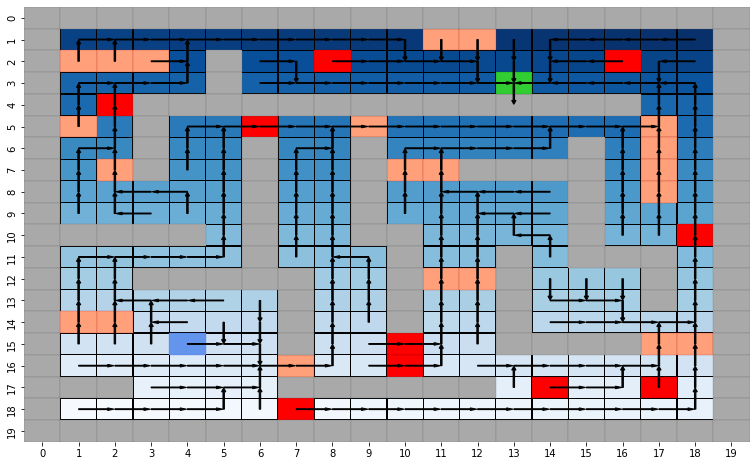

In [ ]:
### DRAW MAZE: OPTIMAL POLICY 
path = get_path(pi)

draw_maze_arrow(maze, path)

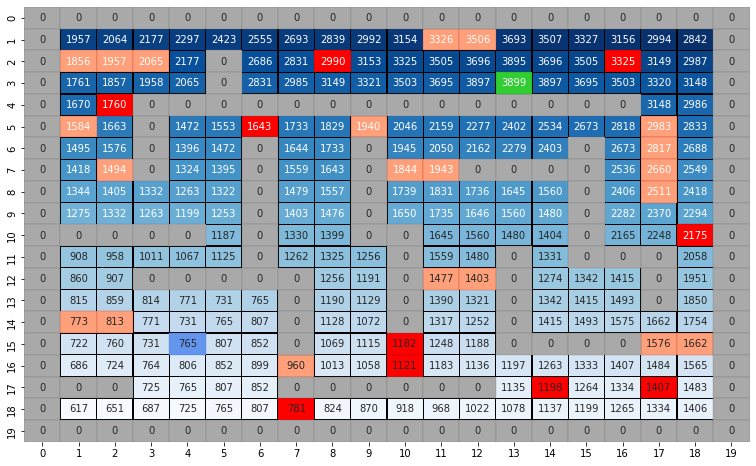

In [ ]:
### DRAW MAZE: OPTIMAL STATE VALUES

draw_maze_values(maze, vi)

Steps: 31


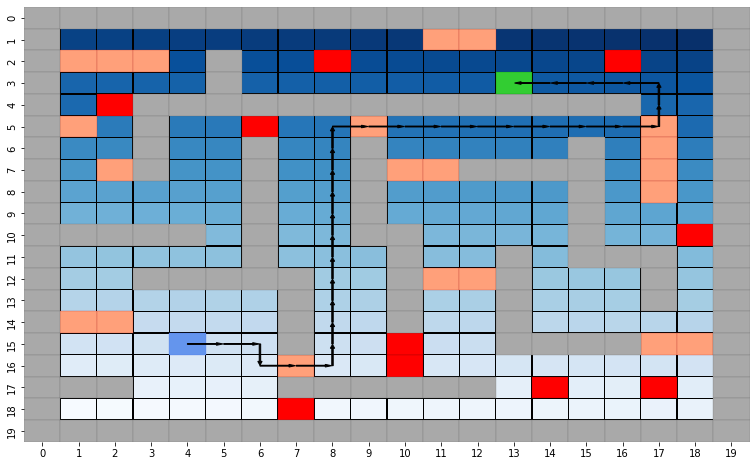

In [ ]:
### DRAW MAZE: OPTIMAL PATH FROM THE START

draw_maze_path(maze, pi)

#### LARGE STOCHASTICITY SCENARIO

𝑝=0.5, 𝛾 =0.95, 𝜃 =0.01

In [ ]:
### VECTOR FORM CALCULATION

# parameters
p = 0.5 # stochasticity
t = 0.01 # threshold
g = 0.95 # gamma

t_mat = generate_transition_matrix(p, actions)

r_mat = generate_reward_matrix(actions)

initial_policy = np.full(248, 3) # 3 = left

pi, vi = policy_iteration_vector(t_mat, r_mat, max, actions_idx, initial_policy, t, g)

print(pi)
print(vi)



Policy iteration: #1
Total policy evaluation iteration: 116


Policy iteration: #2
Total policy evaluation iteration: 170


Policy iteration: #3
Total policy evaluation iteration: 172


Policy iteration: #4
Total policy evaluation iteration: 172


Policy iteration: #5
Total policy evaluation iteration: 172


Policy iteration: #6
Total policy evaluation iteration: 172


Policy iteration: #7
Total policy evaluation iteration: 172


Policy iteration: #8
Total policy evaluation iteration: 172


Policy iteration: #9
Total policy evaluation iteration: 172
[2, 2, 0, 0, 0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 3, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 2, 2, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 

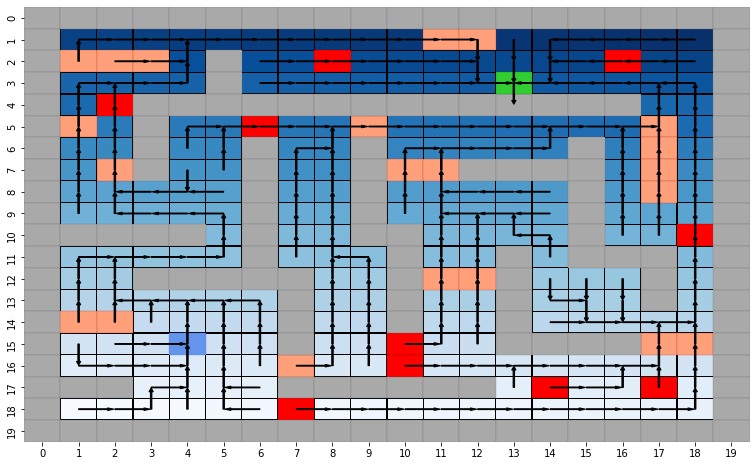

In [ ]:
### DRAW MAZE: OPTIMAL POLICY 
path = get_path(pi)

draw_maze_arrow(maze, path)

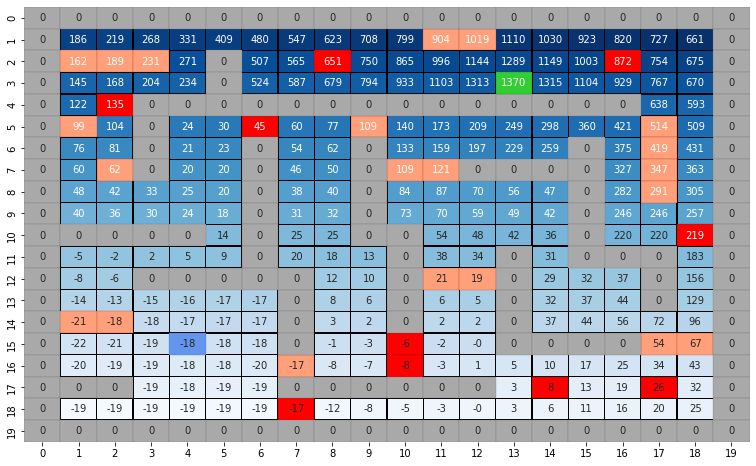

In [ ]:
### DRAW MAZE: OPTIMAL STATE VALUES

draw_maze_values(maze, vi)

Steps: 35


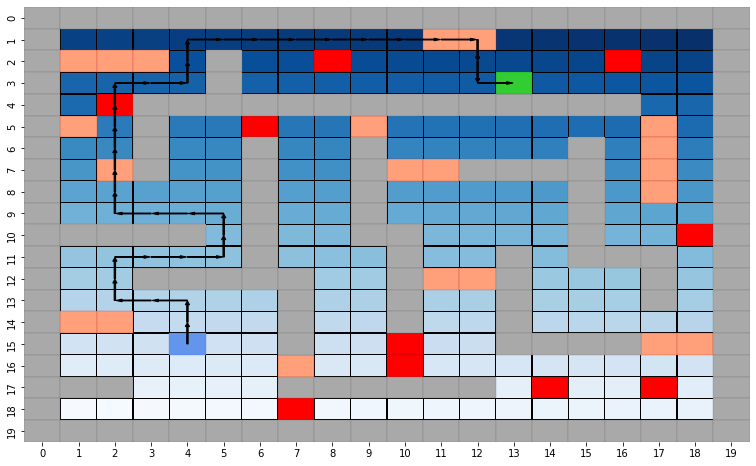

In [ ]:
### DRAW MAZE: OPTIMAL PATH FROM THE START

draw_maze_path(maze, pi)

#### SMALL DISCOUNT FACTOR SCENARIO

𝑝=0.02, 𝛾 =0.55, 𝜃 =0.01

In [ ]:
### VECTOR FORM CALCULATION

# parameters
p = 0.02 # stochasticity
t = 0.01 # threshold
g = 0.55 # gamma

t_mat = generate_transition_matrix(p, actions)

r_mat = generate_reward_matrix(actions)

initial_policy = np.full(248, 3) # 3 = left

pi, vi = policy_iteration_vector(t_mat, r_mat, max, actions_idx, initial_policy, t, g)

print(pi)
print(vi)



Policy iteration: #1
Total policy evaluation iteration: 13


Policy iteration: #2
Total policy evaluation iteration: 18


Policy iteration: #3
Total policy evaluation iteration: 18


Policy iteration: #4
Total policy evaluation iteration: 18


Policy iteration: #5
Total policy evaluation iteration: 18


Policy iteration: #6
Total policy evaluation iteration: 18


Policy iteration: #7
Total policy evaluation iteration: 18


Policy iteration: #8
Total policy evaluation iteration: 18
[3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 0, 3, 3, 3, 1, 3, 3, 1, 1, 3, 3, 3, 1, 3, 1, 1, 1, 1, 2, 2, 1, 1, 3, 3, 3, 0, 0, 2, 2, 0, 3, 3, 0, 3, 3, 1, 1, 1, 1, 1, 0, 0, 0, 0, 3, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 1, 0, 3, 3, 3, 0, 0, 0, 2, 2, 2, 0, 0, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1, 3, 3, 0, 0, 1, 1, 1, 1, 3, 2, 2, 2, 1, 0, 0, 0, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 0, 2, 0, 1, 1, 3, 1, 1, 1, 1, 0, 0, 2, 0, 1, 3, 1, 1, 1, 1, 2, 2, 2, 2

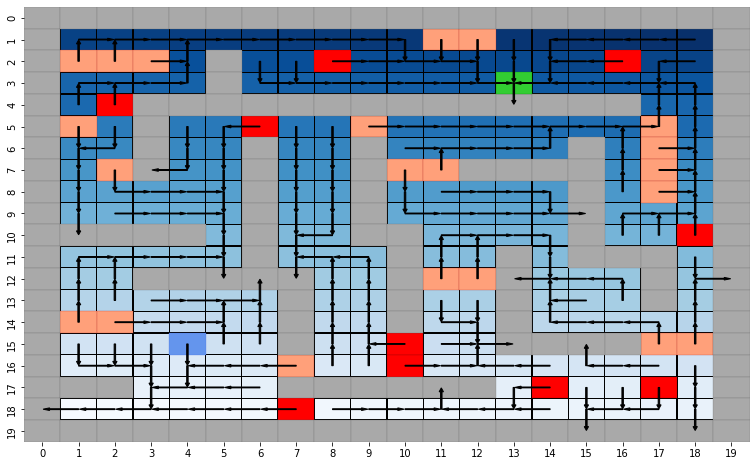

In [ ]:
### DRAW MAZE: OPTIMAL POLICY 
path = get_path(pi)

draw_maze_arrow(maze, path)

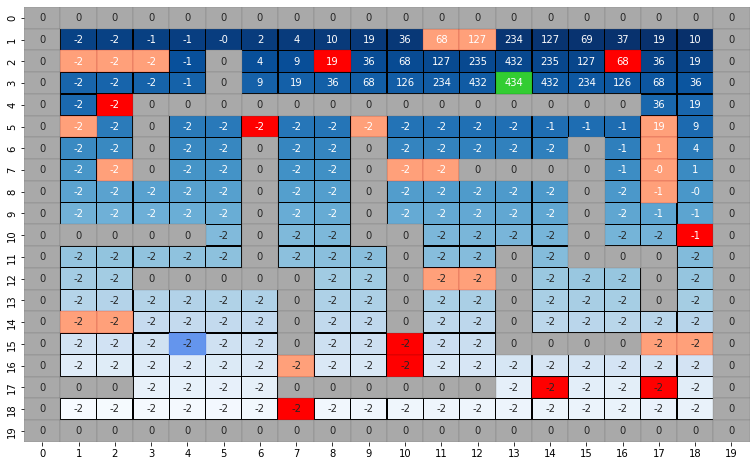

In [ ]:
### DRAW MAZE: OPTIMAL STATE VALUES

draw_maze_values(maze, vi)

Steps: 101


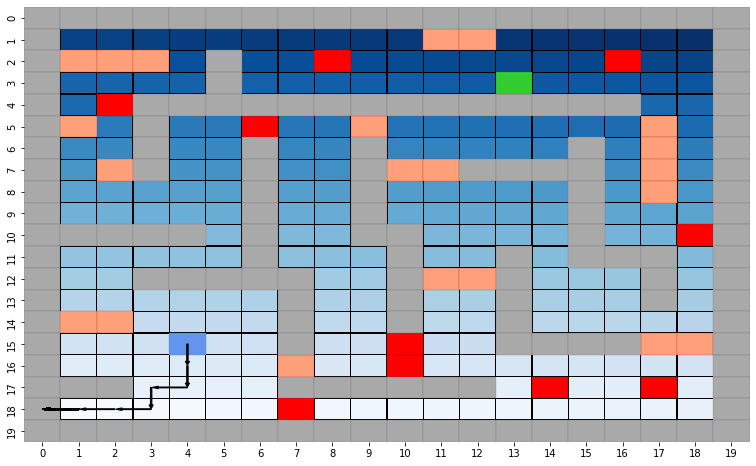

In [ ]:
### DRAW MAZE: OPTIMAL PATH FROM THE START

draw_maze_path(maze, pi)

### PROBLEM 1 - 2 (VECTOR FORM - VALUE ITERATION)

In [ ]:
# This function will perform Value Iteration Vector Form
# t_mat = transition matrices
# r_mat = reward matrices
# max = maximum number of states
# t = threshold
# g = discount factor (gamma)
def value_iteration_vector(t_mat, r_mat, max, t, g):

  v = []
  v.append(np.zeros(max))

  n = 0
  v_star = 0
  pi_star = []

  for pe in range(0, 10000):
    #print(v[pe])
    tmp_v = []
    for i in range(0, max): 
      v_a = []
      for act in actions_idx: # foreach action 0 = U, 1 = D, 2 = R, 3 = L
        tmp_va = 0
        for k in range(0, max): 
          tmp_va += t_mat[act][i, k]*(r_mat[act][i, k] + (g*v[pe][k]))
          #print(tmp_va)
        v_a.append(tmp_va)

      tmp_v.append(np.max(v_a))
      #print(max(v_a))
    v.append(tmp_v)
    
    dv_max = np.max(np.absolute(np.subtract(v[pe+1], v[pe])))
    #print(dv_max)
        
    if dv_max < t:
      v_star = v[pe+1]
      print("Total policy evaluation iteration: " + str(pe+1))
      break

  #print("V*: ")
  #print(v_star)

  for i in range(0, max): 
    v_a = []
    for act in actions_idx: # foreach action 0 = U, 1 = D, 2 = R, 3 = L
      #print("Action: {}".format(j))
      tmp_va = 0
      for k in range(0, max): 
        tmp_va += t_mat[act][i, k]*(r_mat[act][i, k] + (g*v_star[k]))
        #print(tmp_va)
      v_a.append(tmp_va)
      #print(v_a)
    #print("s = {}".format(i+1))
    #print(v_a)
    pi_star.append(np.argmax(v_a))

  #pi_star

  return pi_star, v_star

#### BASE SCENARIO

𝑝=0.02, 𝛾 =0.95, 𝜃 =0.01

In [ ]:
# parameters
p = 0.02 # stochasticity
g = 0.95 # gamma
t = 0.01 # threshold

t_mat = generate_transition_matrix(p, actions)

r_mat = generate_reward_matrix(actions)

pi, vi = value_iteration_vector(t_mat, r_mat, max, t, g)

Total policy evaluation iteration: 194


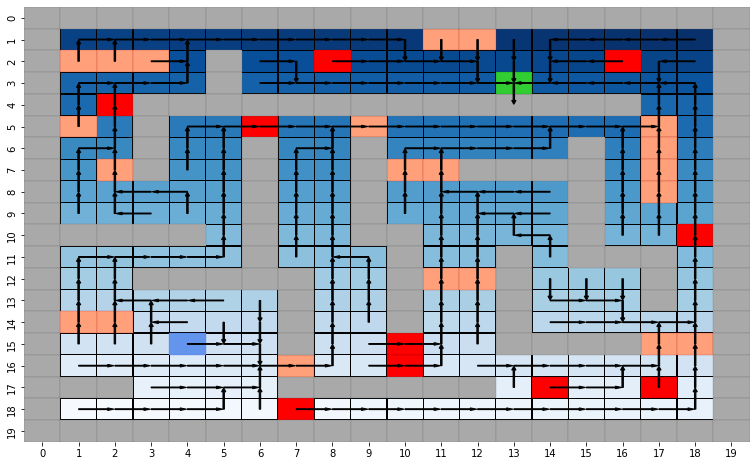

In [ ]:
### DRAW MAZE: OPTIMAL POLICY 
path = get_path(pi)

draw_maze_arrow(maze, path)

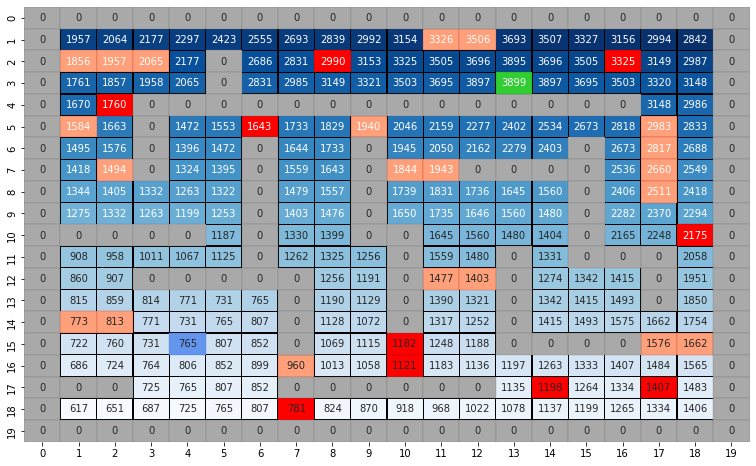

In [ ]:
### DRAW MAZE: OPTIMAL STATE VALUES

draw_maze_values(maze, vi)

Steps: 31


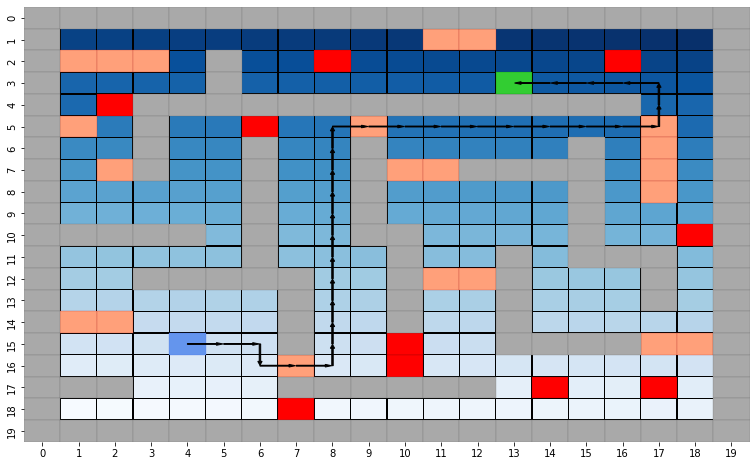

In [ ]:
### DRAW MAZE: OPTIMAL PATH FROM THE START

draw_maze_path(maze, pi)

#### LARGE STOCHASTICITY SCENARIO

𝑝=0.5, 𝛾 =0.95, 𝜃 =0.01

In [ ]:
# parameters
p = 0.5 # stochasticity
g = 0.95 # gamma
t = 0.01 # threshold

t_mat = generate_transition_matrix(p, actions)

r_mat = generate_reward_matrix(actions)

pi, vi = value_iteration_vector(t_mat, r_mat, max, t, g)

Total policy evaluation iteration: 171


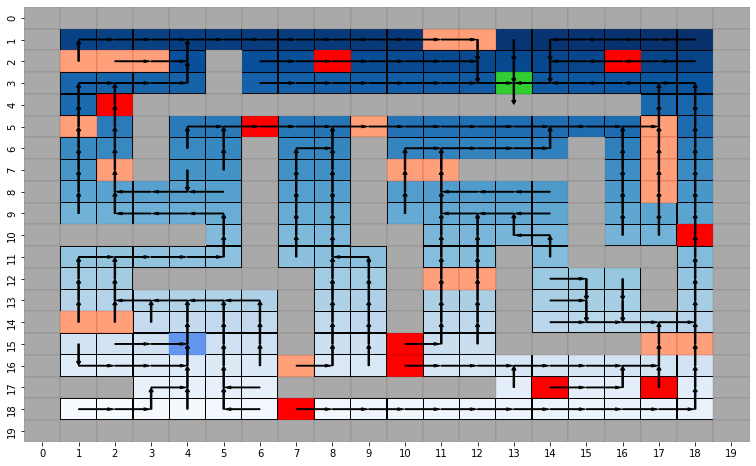

In [ ]:
### DRAW MAZE: OPTIMAL POLICY 
path = get_path(pi)

draw_maze_arrow(maze, path)

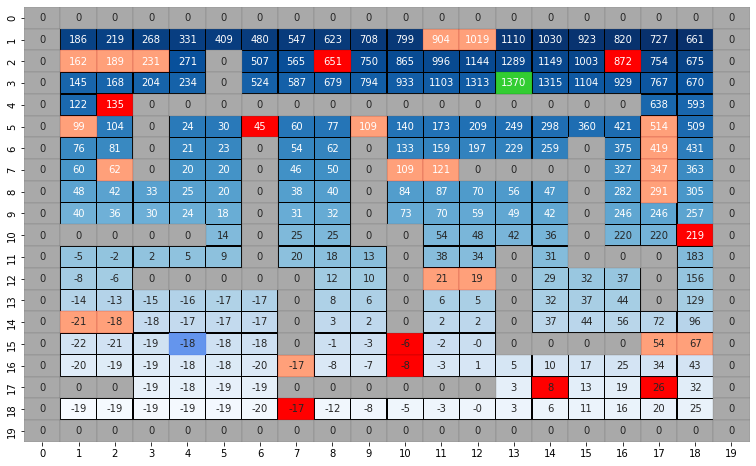

In [ ]:
### DRAW MAZE: OPTIMAL STATE VALUES

draw_maze_values(maze, vi)

Steps: 35


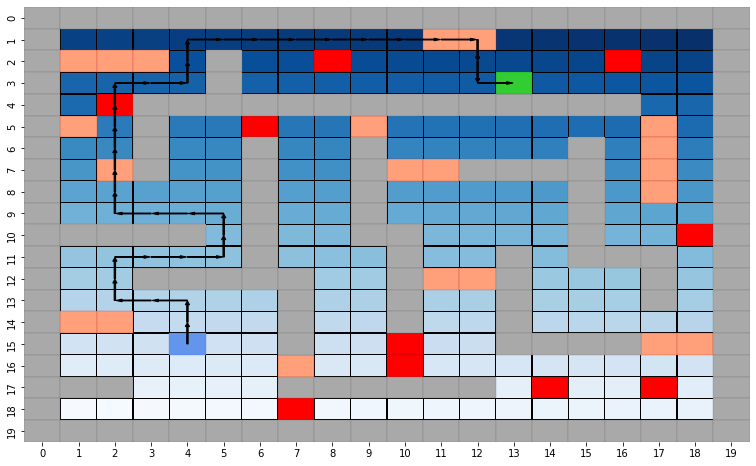

In [ ]:
### DRAW MAZE: OPTIMAL PATH FROM THE START

draw_maze_path(maze, pi)

#### SMALL DISCOUNT FACTOR SCENARIO

𝑝=0.02, 𝛾 =0.55, 𝜃 =0.01

In [ ]:
# parameters
p = 0.02 # stochasticity
g = 0.55 # gamma
t = 0.01 # threshold

t_mat = generate_transition_matrix(p, actions)

r_mat = generate_reward_matrix(actions)

pi, vi = value_iteration_vector(t_mat, r_mat, max, t, g)

Total policy evaluation iteration: 18


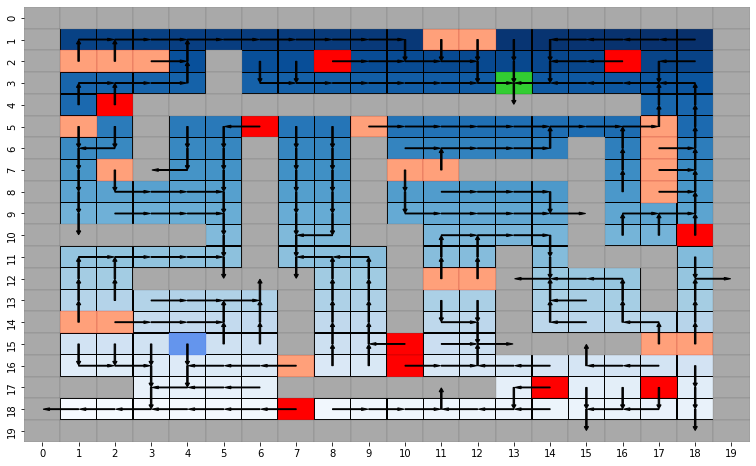

In [ ]:
### DRAW MAZE: OPTIMAL POLICY 
path = get_path(pi)

draw_maze_arrow(maze, path)

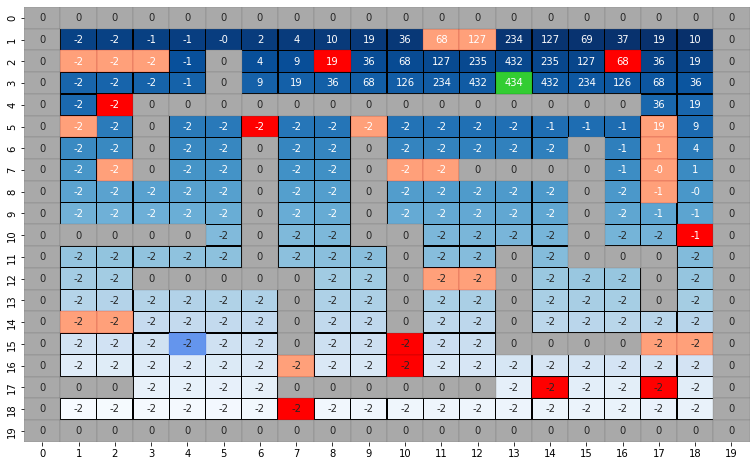

In [ ]:
### DRAW MAZE: OPTIMAL STATE VALUES

draw_maze_values(maze, vi)

Steps: 101


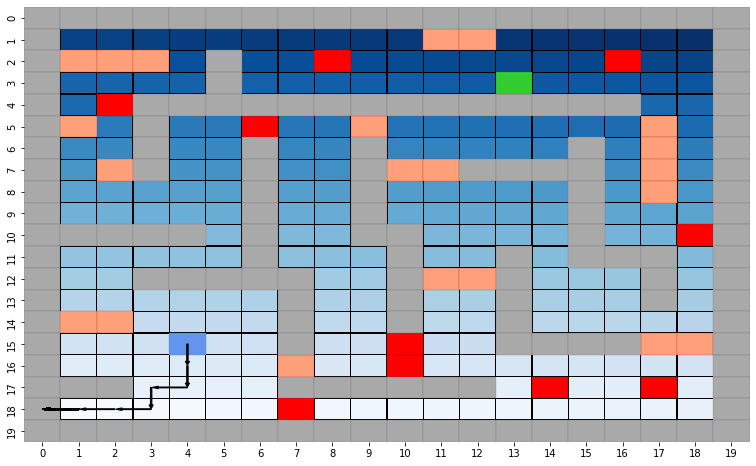

In [ ]:
### DRAW MAZE: OPTIMAL PATH FROM THE START

draw_maze_path(maze, pi)